#Fundamentos de Clasificación

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model, neighbors, naive_bayes

###Generación de puntos

Azules: Sacamos 10 puntos $b_k$ $(k=1,2,…,10)$ de una distribución normal bivariada con media [1,0] y matriz de covarianza cov=[[1,0],[0,1]]. Para producir un punto azul elegimos un $b_k$ al azar con probabilidad uniforme para cada $k$ y generamos un punto de una distribución normal con media $b_k$ y matriz de covarianza cov/5.

Naranjas: primero sacamos 10 puntos $n_k$ $(k=1,2,…,10k=1,2,…,10)$ de una distribución normal bivariada con media [0,1] y matriz de covarianza cov. Para producir un punto naranja elegimos un $n_k$ al azar con probabilidad uniforme para cada $k$ y generamos un punto de una distribución normal con media $n_k$ y matriz de covarianza cov/5.

In [2]:
np.random.seed(1)

In [3]:
N_training = 200
N = 2000

In [4]:
cov = np.array([[1,0],[0,1]])
mean_b = np.array([1,0])
mean_o = np.array([0,1])

bk1_b, bk2_b = np.random.multivariate_normal(mean_b, cov, 10).T
bk1_o, bk2_o = np.random.multivariate_normal(mean_o, cov, 10).T

In [5]:
x_b_training = np.zeros(N_training)
y_b_training = np.zeros(N_training)
x_o_training = np.zeros(N_training)
y_o_training = np.zeros(N_training)

x_b = np.zeros(N)
y_b = np.zeros(N)
x_o = np.zeros(N)
y_o = np.zeros(N)

In [6]:
for i in range(N_training):
    random_index = int(np.random.uniform(0,10))
    
    bk1_b_random = bk1_b[random_index]
    bk2_b_random = bk2_b[random_index]
    
    x_b_t, y_b_t = np.random.multivariate_normal([bk1_b_random,bk2_b_random], cov/5.0, 1).T
    
    x_b_training[i] = x_b_t[0]
    y_b_training[i] = y_b_t[0]
    
    random_index = int(np.random.uniform(0,10))
    
    bk1_o_random = bk1_o[random_index]
    bk2_o_random = bk2_o[random_index]
    
    x_o_t, y_o_t = np.random.multivariate_normal([bk1_o_random,bk2_o_random], cov/5.0, 1).T
    
    x_o_training[i] = x_o_t[0]
    y_o_training[i] = y_o_t[0]

In [7]:
for i in range(N):
    random_index = int(np.random.uniform(0,10))
    
    bk1_b_random = bk1_b[random_index]
    bk2_b_random = bk2_b[random_index]
    
    x_b_t, y_b_t = np.random.multivariate_normal([bk1_b_random,bk2_b_random], cov/5.0, 1).T
    
    x_b[i] = x_b_t[0]
    y_b[i] = y_b_t[0]
    
    random_index = int(np.random.uniform(0,10))
    
    bk1_o_random = bk1_o[random_index]
    bk2_o_random = bk2_o[random_index]
    
    x_o_t, y_o_t = np.random.multivariate_normal([bk1_o_random,bk2_o_random], cov/5.0, 1).T
    
    x_o[i] = x_o_t[0]
    y_o[i] = y_o_t[0]

(-3.0, 4.0, -4.0, 4.0)

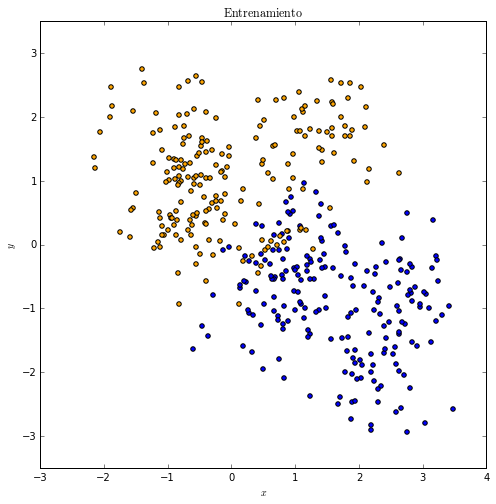

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(x_b_training, y_b_training, c='blue')
plt.scatter(x_o_training, y_o_training, c='orange')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\mathrm{Entrenamiento}$')
plt.axis('equal')

(-3.0, 5.0, -4.0, 4.0)

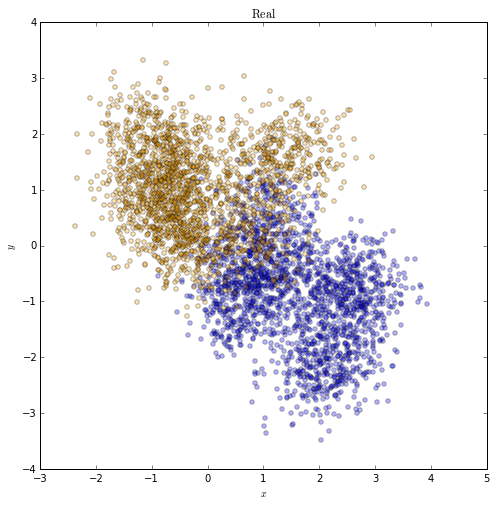

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(x_b, y_b, c='blue', alpha=0.3)
plt.scatter(x_o, y_o, c='orange', alpha = 0.3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\mathrm{Real}$')
plt.axis('equal')

In [10]:
data_training = np.concatenate((np.array([x_b_training,y_b_training]).T, np.array([x_o_training,y_o_training]).T))
targets_training = np.concatenate((np.zeros(N_training),np.ones(N_training)))

In [11]:
data = np.concatenate((np.array([x_b,y_b]).T, np.array([x_o,y_o]).T))
targets = np.concatenate((np.zeros(N),np.ones(N)))

#Figura 2.1

In [12]:
linear_regression = linear_model.LinearRegression()

In [13]:
linear_regression.fit(data_training, targets_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Sabemos que $f(x,y)=\beta_0+\beta_1 x+\beta_2 y$

In [14]:
beta_0 = linear_regression.intercept_
beta_1 = linear_regression.coef_[0]
beta_2 = linear_regression.coef_[1]

También que la frontera es dada por la línea $y = mx+b$ donde

$b = -(\beta_0 - 0.5)/\beta_2$

$m = -\beta_1/\beta_2$

In [15]:
b = (beta_0-0.5)/beta_2
m = -beta_1/beta_2

print m, b

0.571610294244 0.365839851023


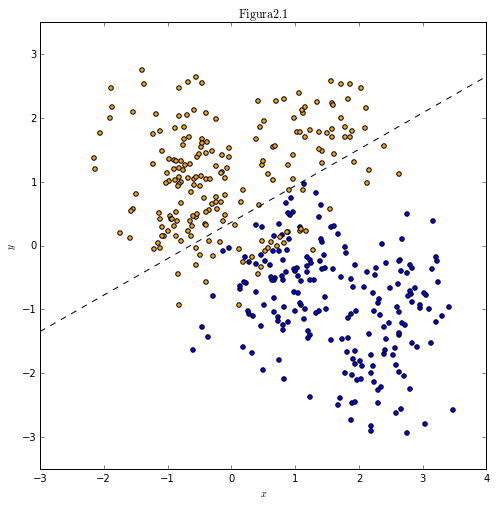

In [16]:
#Final line:

line = np.linspace(-3,4)
parameters_line = [m, b] # m, b -> y=mx+b

plt.figure(figsize=(8,8))
plt.scatter(x_b_training, y_b_training, c='blue')
plt.scatter(x_o_training, y_o_training, c='orange')
plt.plot(line, parameters_line[0]*line+parameters_line[1], c='k', linestyle='--')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\mathrm{Figura 2.1}$')
plt.axis('equal')
plt.xlim(-3,4)
plt.ylim(-3,3)
plt.savefig('fig2.1.png')

#Figura 2.2

In [17]:
k15_neighbors = neighbors.KNeighborsRegressor(n_neighbors=15)

In [18]:
k15_neighbors.fit(data_training, targets_training)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')

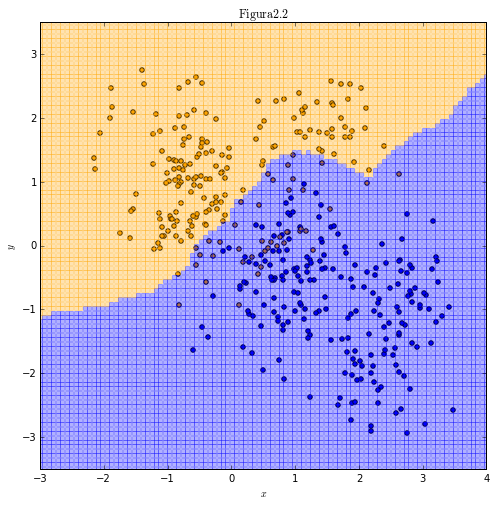

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(x_b_training, y_b_training, c='blue')
plt.scatter(x_o_training, y_o_training, c='orange')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\mathrm{Figura 2.2}$')
plt.axis('equal')
plt.xlim(-3,4)
plt.ylim(-3,3)

i = -3
while(i<4):
    j=-3.5
    while (j<3.5):
        predicted_color = int(k15_neighbors.predict([[i,j]])[0])
        if (predicted_color <= 0.5):
            plt.scatter(i,j,color='blue',marker='s',s=18,alpha=0.3)
        else:
            plt.scatter(i,j,color='orange',marker='s',s=18,alpha=0.3)
        j += 0.07
    i += 0.07
    
plt.savefig('fig2.2.png')

#Figura 2.3

In [20]:
k1_neighbors = neighbors.KNeighborsRegressor(n_neighbors=1)

In [21]:
k1_neighbors.fit(data_training, targets_training)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

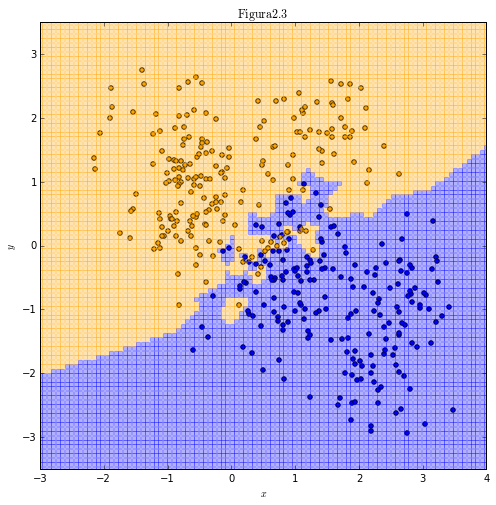

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(x_b_training, y_b_training, c='blue')
plt.scatter(x_o_training, y_o_training, c='orange')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\mathrm{Figura 2.3}$')
plt.axis('equal')
plt.xlim(-3,4)
plt.ylim(-3,3)

i = -3
while(i<4):
    j=-3.5
    while (j<3.5):
        predicted_color = int(k1_neighbors.predict([[i,j]])[0])
        if (predicted_color <= 0.5):
            plt.scatter(i,j,color='blue',marker='s',s=18,alpha=0.3)
        else:
            plt.scatter(i,j,color='orange',marker='s',s=18,alpha=0.3)
        j += 0.07
    i += 0.07
    
plt.savefig('fig2.3.png')

#Figura 2.4

Se visualizan los errores para cada caso (antes de cuantificarlo)

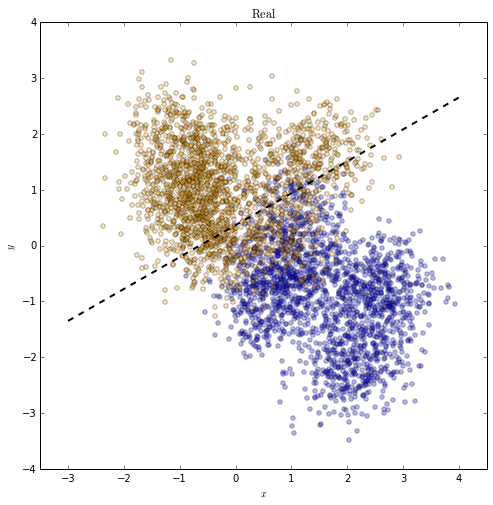

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(x_b, y_b, c='blue', alpha = 0.3)
plt.scatter(x_o, y_o, c='orange', alpha = 0.3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\mathrm{Real}$')
plt.axis('equal')

plt.plot(line, parameters_line[0]*line+parameters_line[1], c='k', linestyle='--', lw=2)

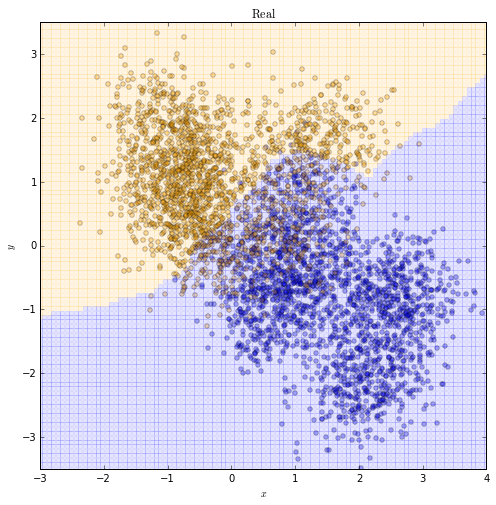

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(x_b, y_b, c='blue', alpha = 0.3)
plt.scatter(x_o, y_o, c='orange', alpha = 0.3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\mathrm{Real}$')
plt.axis('equal')
plt.xlim(-3,4)
plt.ylim(-3,3)

i = -3
while(i<4):
    j=-3.5
    while (j<3.5):
        predicted_color = int(k15_neighbors.predict([[i,j]])[0])
        if (predicted_color < 0.5):
            plt.scatter(i,j,color='blue',marker='s',s=18,alpha=0.1)
        else:
            plt.scatter(i,j,color='orange',marker='s',s=18,alpha=0.1)
        j += 0.07
    i += 0.07

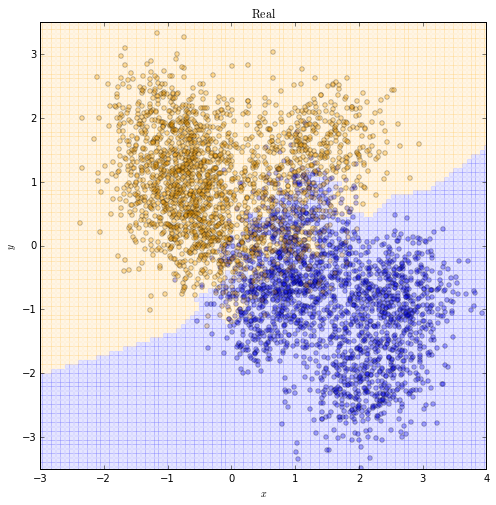

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(x_b, y_b, c='blue', alpha = 0.3)
plt.scatter(x_o, y_o, c='orange', alpha = 0.3)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$\mathrm{Real}$')
plt.axis('equal')
plt.xlim(-3,4)
plt.ylim(-3,3)

i = -3
while(i<4):
    j=-3.5
    while (j<3.5):
        predicted_color = int(k1_neighbors.predict([[i,j]])[0])
        if (predicted_color < 0.5):
            plt.scatter(i,j,color='blue',marker='s',s=18,alpha=0.1)
        else:
            plt.scatter(i,j,color='orange',marker='s',s=18,alpha=0.1)
        j += 0.07
    i += 0.07

In [26]:
#Linear

predicted_colors_training = linear_regression.predict(data_training)
predicted_colors = linear_regression.predict(data)

error_linear_training = ( len(np.where(predicted_colors_training[:N_training] >= 0.5)[0]) + 
                         len(np.where(predicted_colors_training[N_training:] < 0.5)[0]) )/float(2*N_training)
error_linear = ( len(np.where(predicted_colors[:N] >= 0.5)[0]) + 
                len(np.where(predicted_colors[N:] < 0.5)[0]) )/float(2*N)

In [27]:
print error_linear_training, error_linear

0.08 0.0895


In [28]:
#Neighbors 15

predicted_colors_training = k15_neighbors.predict(data_training)
predicted_colors = k15_neighbors.predict(data)

error_neighbors15_training = ( len(np.where(predicted_colors_training[:N_training] >= 0.5)[0]) + 
                              len(np.where(predicted_colors_training[N_training:] < 0.5)[0]) )/float(2*N_training)
error_neighbors15 = ( len(np.where(predicted_colors[:N] >= 0.5)[0]) + 
                     len(np.where(predicted_colors[N:] < 0.5)[0]) )/float(2*N)

In [29]:
print error_neighbors15_training, error_neighbors15

0.06 0.09075


In [30]:
#Neighbors 1

predicted_colors_training = k1_neighbors.predict(data_training)
predicted_colors = k1_neighbors.predict(data)

error_neighbors1_training = ( len(np.where(predicted_colors_training[:N_training] >= 0.5)[0]) + 
                              len(np.where(predicted_colors_training[N_training:] < 0.5)[0]) )/float(2*N_training)
error_neighbors1 = ( len(np.where(predicted_colors[:N] >= 0.5)[0]) + 
                     len(np.where(predicted_colors[N:] < 0.5)[0]) )/float(2*N)

In [31]:
print error_neighbors1_training, error_neighbors1

0.0 0.1045


#Figura 2.4

In [32]:
neighbors_ks = [int(l) for l in np.logspace(0,np.log10(151),20)]
error_neighbors_training = np.zeros(20)
error_neighbors = np.zeros(20) 

for i in range(len(neighbors_ks)):
    k_neighbors = neighbors.KNeighborsRegressor(n_neighbors=neighbors_ks[i])
    k_neighbors.fit(data_training, targets_training)
    
    predicted_colors_training = k_neighbors.predict(data_training)
    predicted_colors = k_neighbors.predict(data)
    
    error_neighbors_training[i] = ( len(np.where(predicted_colors_training[:N_training] >= 0.5)[0]) + 
                                   len(np.where(predicted_colors_training[N_training:] < 0.5)[0]) )/float(2*N_training)
    error_neighbors[i] = ( len(np.where(predicted_colors[:N] >= 0.5)[0]) + 
                          len(np.where(predicted_colors[N:] < 0.5)[0]) )/float(2*N)

In [33]:
gnb = naive_bayes.GaussianNB()
predicted_colors = gnb.fit(data_training, targets_training).predict(data)

error_bayes = ( len(np.where(predicted_colors[:N] >= 0.5)[0]) + 
               len(np.where(predicted_colors[N:] < 0.5)[0]) )/float(2*N)

In [34]:
print error_bayes

0.08925


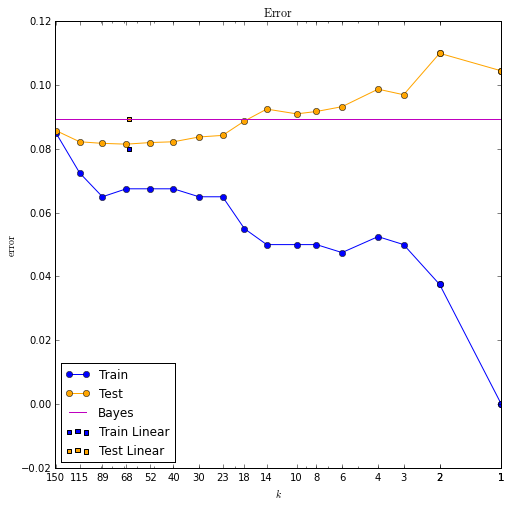

In [36]:
plt.figure(figsize=(8,8))
plt.semilogx(neighbors_ks, error_neighbors_training, c='blue', marker='o', label='Train')
plt.semilogx(neighbors_ks, error_neighbors, c='orange', marker='o', label='Test')
plt.scatter(N_training/3, error_linear_training, c='blue', marker='s', label='Train Linear')
plt.scatter(N_training/3, error_linear, c='orange', marker='s', label='Test Linear')
plt.axhline(y=error_bayes, xmin=0, xmax=1, color='m', label='Bayes')
plt.xlabel('$k$')
plt.ylabel('$\mathrm{error}$')
plt.title('$\mathrm{Error}$')
plt.xticks(neighbors_ks, neighbors_ks)
plt.xlim(0,152)
plt.legend(loc='best')

ax = plt.gca()
ax.invert_xaxis()

plt.savefig('fig2.4.png')